<a href="https://colab.research.google.com/github/Korniev/Data-Sciense/blob/main/hw_10/hw_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Частина 1

В якості домашнього завдання вам пропонується створити нейронну мережу за допомогою механізмів Keras, яка буде класифікувати товари із датасету fasion_mnist.

На відміну від попереднього завдання вам пропонується створити згорткову нейромережу. Підберіть архітектуру мережі та навчіть її на даних із датасету fasion_mnist. Спробуйте досягти максимально можливої точності класифікації за рахунок маніпуляції параметрами мережі. Порівняйте точність отриманої згорткової мережі з точністю багатошарової мережі з попереднього завдання. Зробіть висновки.

Перше, з чого нам потрібно почати – це завантажити датасет Fashion MNIST. Він доступний безпосередньо через Keras. Імпортуємо бібліотеки:

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras import Sequential
from keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from keras import optimizers, losses
from sklearn.metrics import classification_report

Завантажимо датасет і подивимось на його вміст:

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train.shape, x_test.shape, y_train.shape, y_test.shape

4422102/4422102 [==============================] - 0s 0us/step


((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

Ми вже знаємо, що кожному зображенню відповідає одна мітка. Оскільки назви класів не включено до набору даних, збережемо їх тут, щоб використати пізніше при побудові зображень. Збережемо їх в ліст class_names:

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Давайте подивимось на перший елемент датасету:

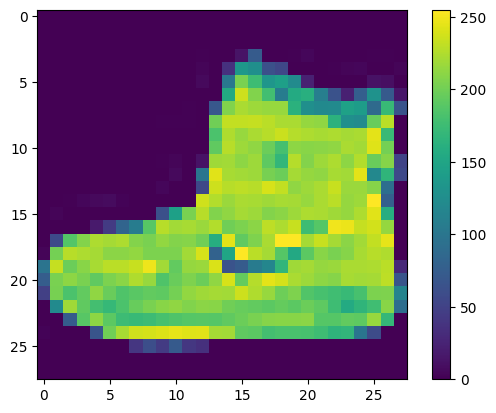

In [4]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

Після завантаження нам потрібно нормалізувати дані. Це зробить процес навчання мережі більш ефективним. Тобто будуть дані в діапазоні від 0 до 1.

In [6]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


Щоб переконатися, що дані в правильному форматі, і що ми готові до побудови та навчання мережі, покажемо перші 25 зображень з навчального набору і покажемо назву класу під кожним зображенням.

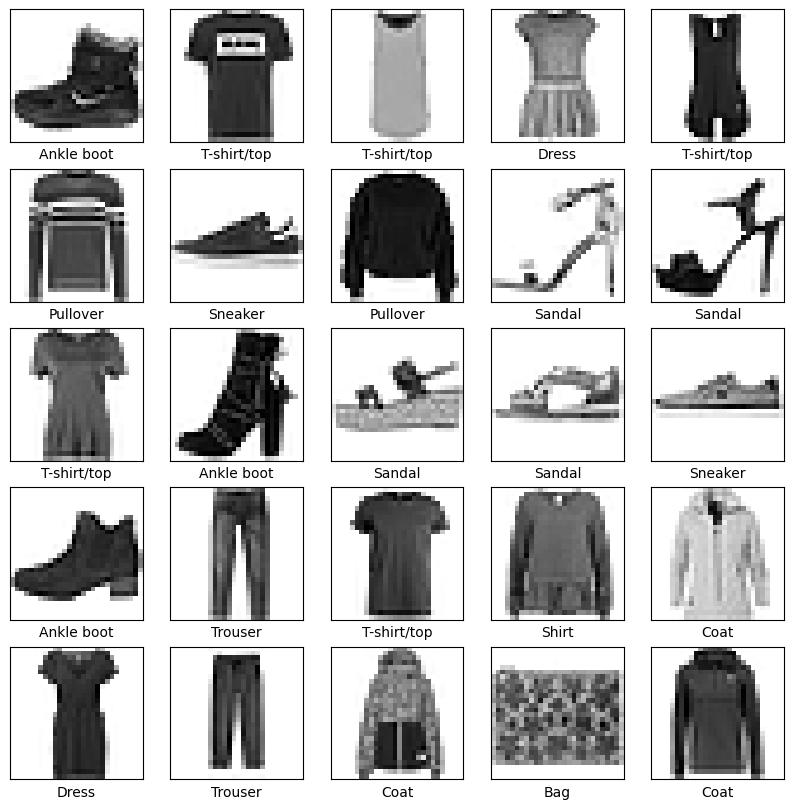

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

Бачимо, що в нас дані в такій формі:

In [8]:
x_train.shape

(60000, 28, 28)

Кожна картинка у нас в 2d:

In [9]:
x_train[0].shape

(28, 28)

Картинка в 2D але Згорткові нейронні мережі працюють в 3d форматі - height x width x color. Тому додамо третю розмірність:

In [10]:
x_train= np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)
print(x_train.shape)

(60000, 28, 28, 1)


Супер! Тепер подивимось яка кількість класів у нас в датасеті (хоча з попередньої ДЗ ми знаємо, що їх 10) але все ж:

In [11]:
K= len(set(y_train))
print("number of classes:", K)

number of classes: 10


Окей, супер. Зараз в нас вже є завантажений нормалізований датасет. Тепер ми вже можемо створити нашу модель. Ми почнемо з простої згорткової нейронної мережі:

In [17]:
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation="relu"),

    Flatten(),
    Dropout(0.2),
    Dense(64, activation="relu"),
    Dropout(0.2),
    Dense(10, activation="softmax")
])

Тепер надрукуємо опис архітектури мережі:

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 flatten_1 (Flatten)         (None, 1152)             

Перед тренуванням моделі нам її потрібно скомпілювати. Це включає вибір оптимізатора, функції втрат і метрик для оцінки.

In [19]:
model.compile(optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Тепер ми можемо навчати модель, використовуючи тренувальні дані:

In [20]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 7ms/step - loss: 0.7156 - accuracy: 0.7354 - val_loss: 0.4696 - val_accuracy: 0.8273
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.4326 - accuracy: 0.8425 - val_loss: 0.3676 - val_accuracy: 0.8655
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3660 - accuracy: 0.8676 - val_loss: 0.3326 - val_accuracy: 0.8758
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3298 - accuracy: 0.8806 - val_loss: 0.2980 - val_accuracy: 0.8902
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3028 - accuracy: 0.8903 - val_loss: 0.2776 - val_accuracy: 0.8987
Epoch 6/10
375/375 [==============================] - 2s 6ms/step - loss: 0.2801 - accuracy: 0.8982 - val_loss: 0.2776 - val_accuracy: 0.8977
Epoch 7/10
375/375 [==============================] - 3s 7ms/step - loss: 0.2669 - accuracy: 0.9019 - val_loss: 0.2588 - val_accuracy: 0.9048
Epoch 

Давайте візуалізуємо отримані дані шляхом відображення отриманих результатів на графіках

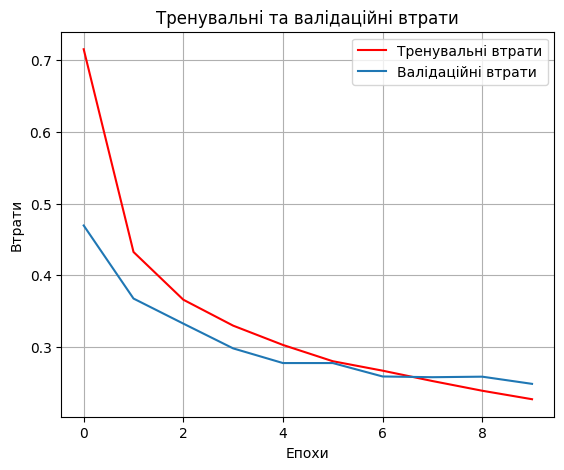

In [21]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Тренувальні втрати', color='red')
plt.plot(history.history['val_loss'], label='Валідаційні втрати')
plt.title('Тренувальні та валідаційні втрати')
plt.xlabel('Епохи')
plt.ylabel('Втрати')
plt.grid(True)
plt.legend()


plt.show()

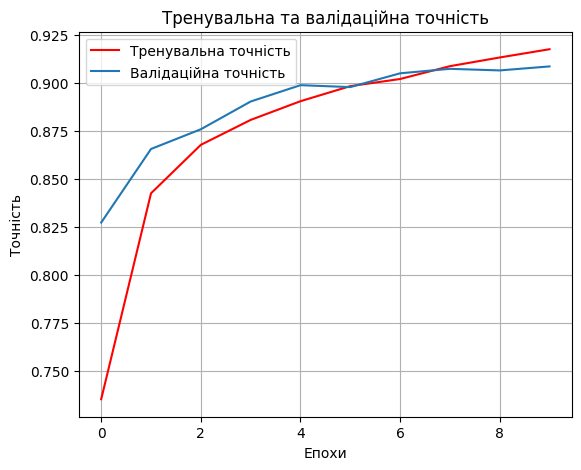

In [22]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Тренувальна точність', color='red')
plt.plot(history.history['val_accuracy'], label='Валідаційна точність')
plt.title('Тренувальна та валідаційна точність')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.grid(True)
plt.legend()

plt.show()